In [1]:
#import libraries
import pandas as pd
from pandas import Series, DataFrame


In [2]:
#set up the titanic csv file as a DataFrame
titanic_df = pd.read_csv("titanic-training-data.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some basic questions to solve

1. Who were the passengers on the titanic? (Ages, Gender, Class etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then, we will dig deeper with a broader question:

5. What factors helped someone survived the sinking?


1. Who were the passengers on the titanic? 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


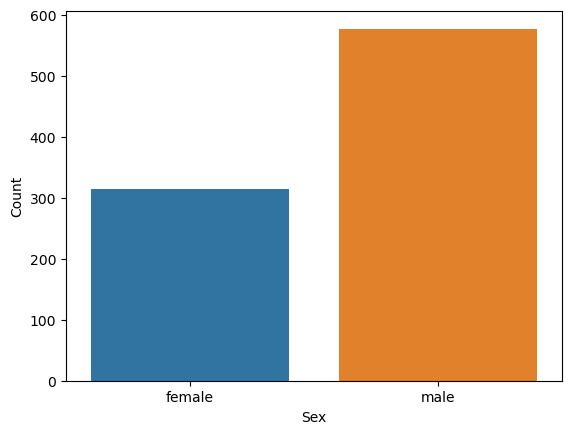

In [6]:
#lets first check the gender

sns.barplot(x='Sex', y='Count', data=titanic_df.groupby('Sex').size().reset_index(name='Count'))
plt.show()

In [7]:
grouped_data_by_Sex = titanic_df.groupby('Sex').size().reset_index(name='Count')
grouped_data_by_Sex

,Sex,Count
0,female,314
1,male,577


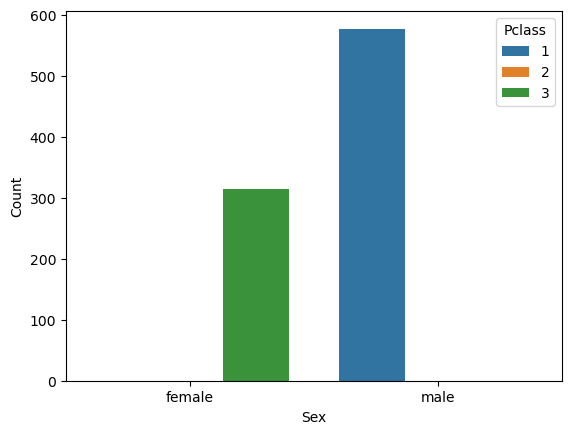

In [8]:
sns.barplot(x = 'Sex', y='Count', data=grouped_data_by_Sex, hue=titanic_df['Pclass'])
plt.show()

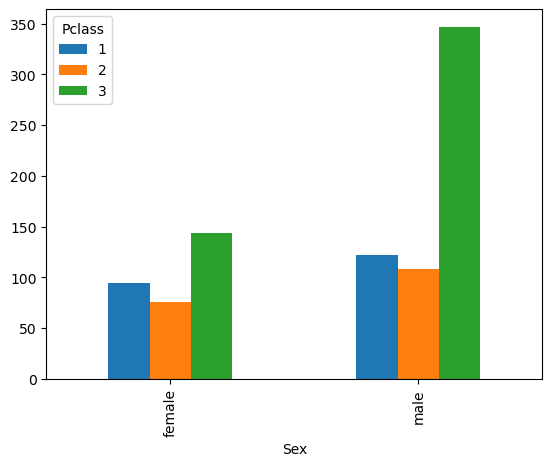

In [9]:

grouped_data = titanic_df.groupby('Sex')['Pclass'].value_counts().unstack().fillna(0)

# Using Seaborn's barplot to create the visualization
grouped_data.plot(kind='bar', stacked=False)

# Display the plot
plt.show()

In [10]:
grouped_data

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [11]:
grouped_data2 = titanic_df.groupby('Pclass')['Sex'].value_counts().unstack()
grouped_data2


Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


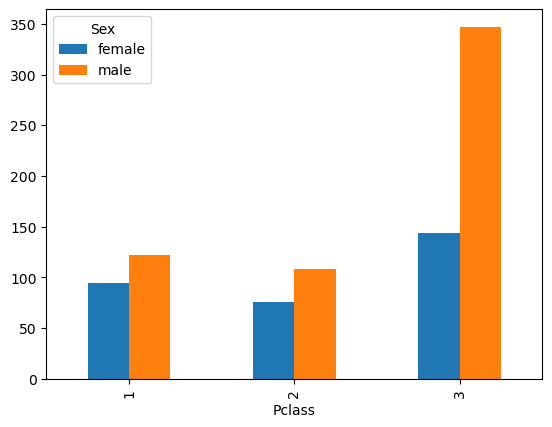

In [12]:
grouped_data2.plot(kind='bar', stacked=False)
plt.show()

In [13]:
#creating new function 'male_female_child' with an argument passenger. 
#if age< 16, those are considered as child else it will return the respective gender

def male_female_child(passenger):
    age, sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [14]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [15]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Text(0.5, 1.0, 'Class vs Person comparission')

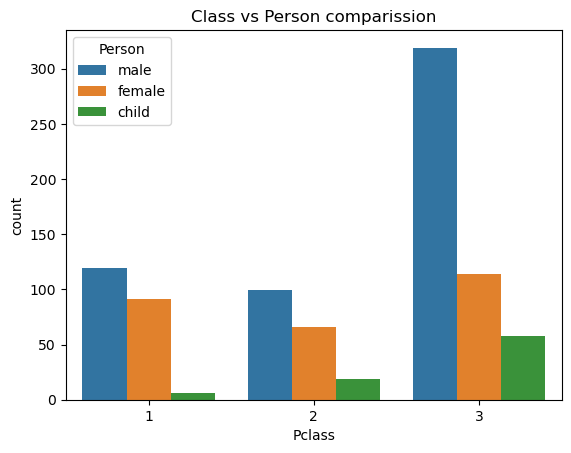

In [17]:
sns.countplot(x='Pclass', data = titanic_df, hue='Person') 
plt.title("Class vs Person comparission")

<Axes: >

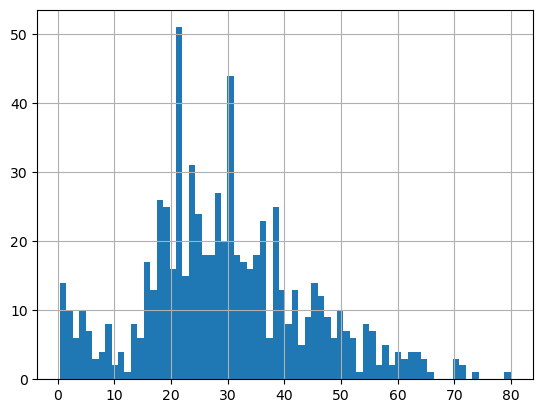

In [18]:
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

In [20]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

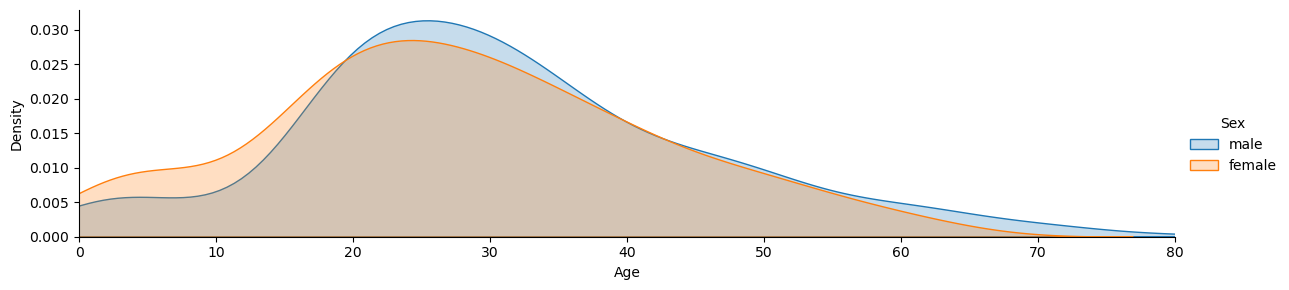

In [21]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

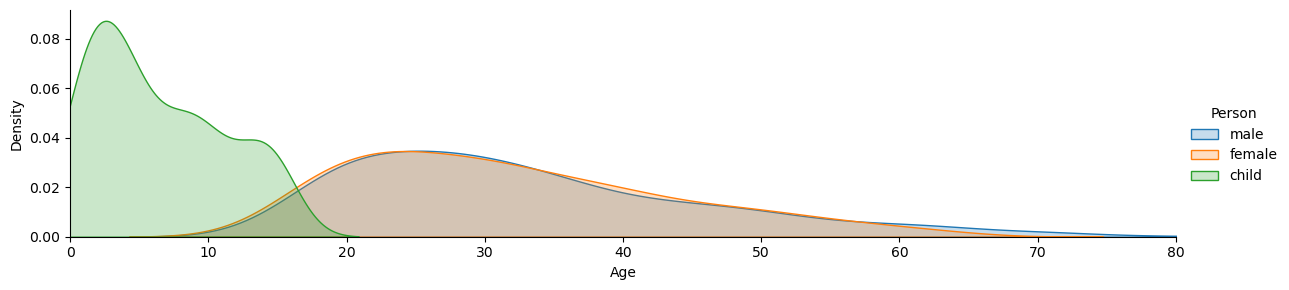

In [22]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

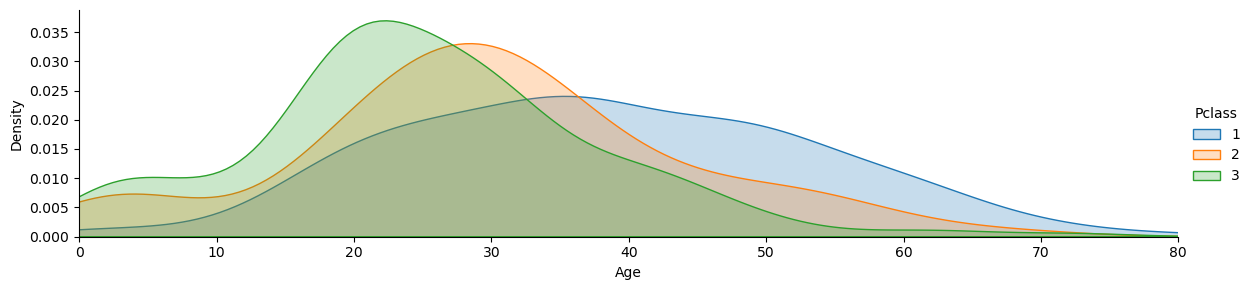

In [23]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [24]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [25]:
deck = titanic_df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [26]:
deck.isnull().sum()

0

<Axes: xlabel='Cabin', ylabel='count'>

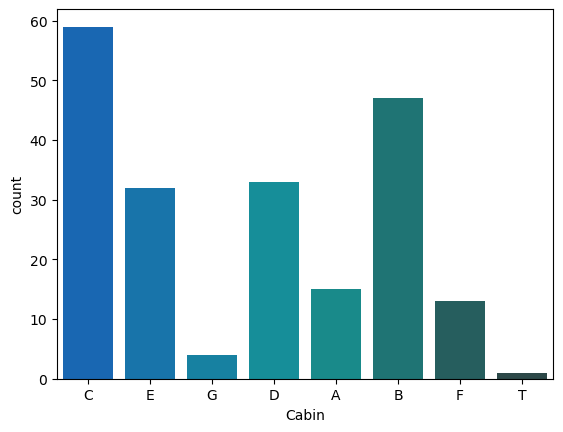

In [27]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x = 'Cabin', data=cabin_df, palette='winter_d')

<Axes: xlabel='Cabin', ylabel='count'>

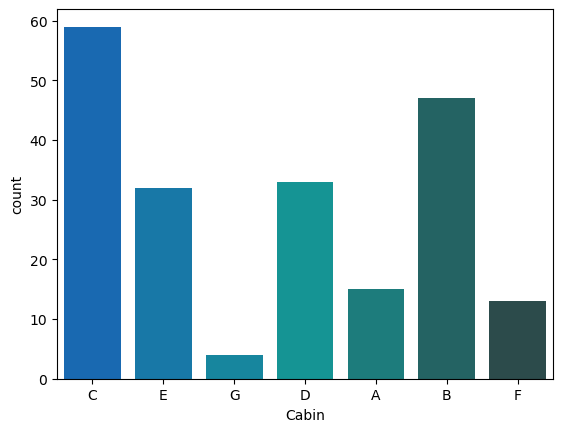

In [28]:
#Remove 'T' as it is an outlier 

cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot(x= 'Cabin', data=cabin_df, palette='winter_d')


<Axes: xlabel='Cabin', ylabel='count'>

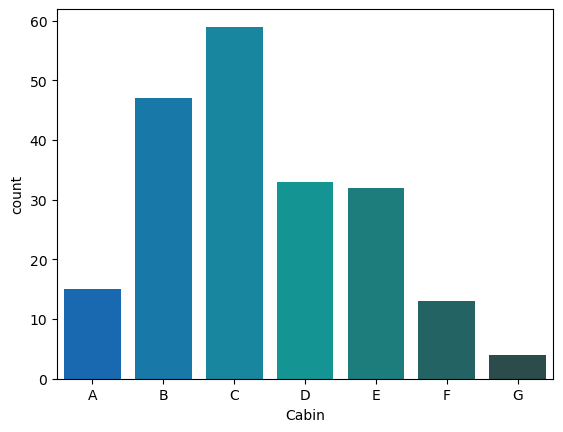

In [29]:
sns.countplot(x= 'Cabin', data=cabin_df, palette='winter_d', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='Embarked', ylabel='count'>

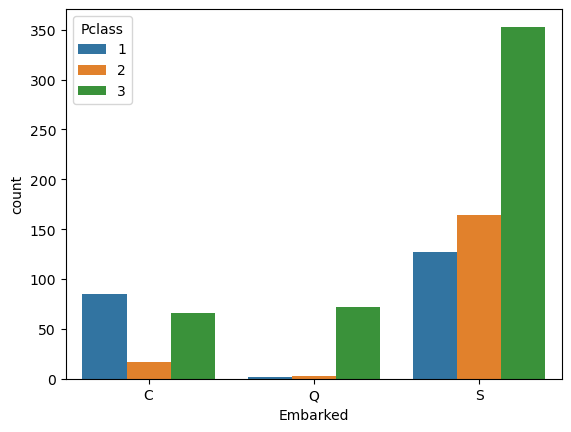

In [31]:
sns.countplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'])

In [32]:
#who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [33]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [34]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [35]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\nloga\AppData\Local\Temp\ipykernel_21008\2371658283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [36]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


<Axes: xlabel='Alone', ylabel='count'>

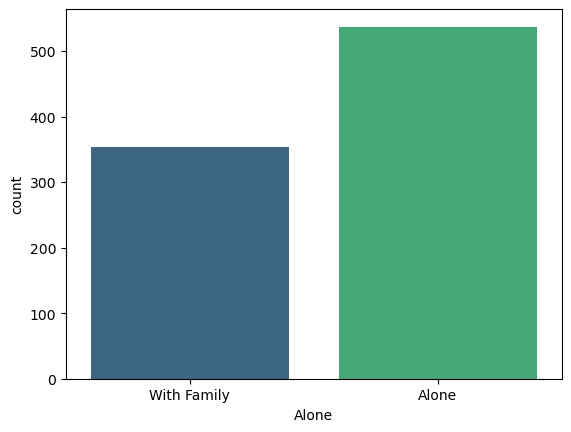

In [37]:
sns.countplot(x='Alone', data=titanic_df, palette='viridis')

In [38]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [39]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes


<Axes: xlabel='Survivor', ylabel='count'>

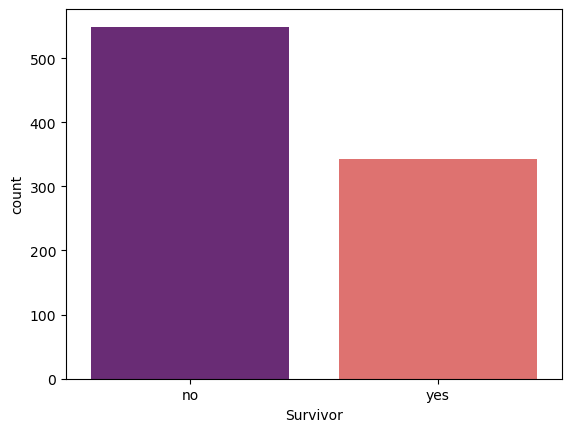

In [40]:
sns.countplot(x='Survivor', data= titanic_df, palette='magma')

<Axes: xlabel='Survivor', ylabel='count'>

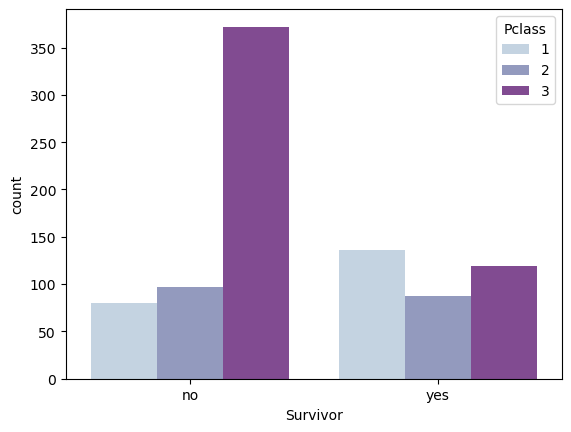

In [41]:
sns.countplot(x='Survivor', data=titanic_df, hue='Pclass', palette='BuPu')

<Axes: xlabel='Pclass', ylabel='count'>

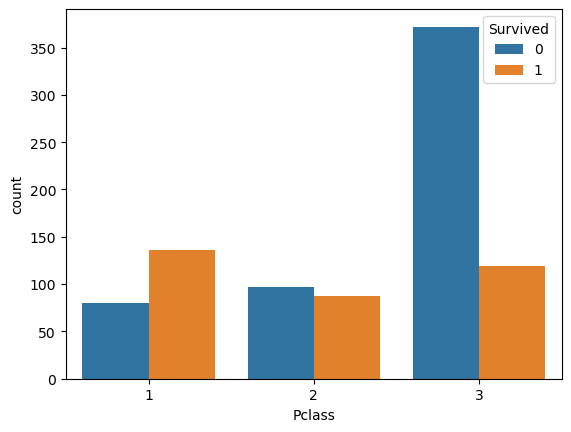

In [42]:
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

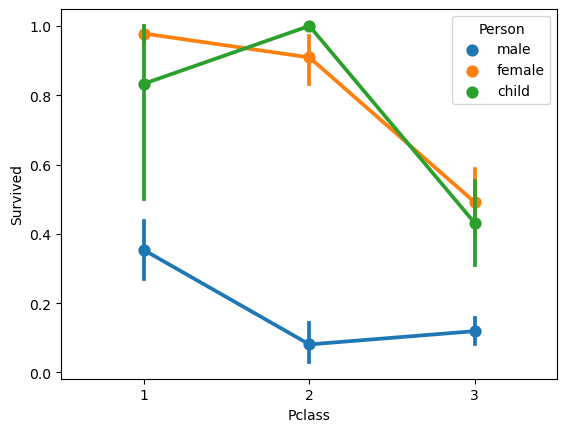

In [43]:
sns.pointplot(x='Pclass', y='Survived', hue='Person', data=titanic_df)

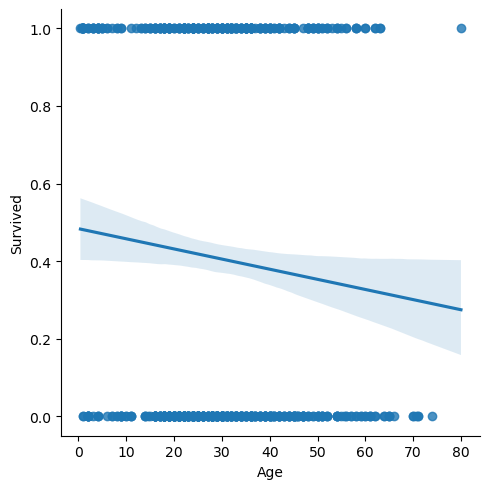

In [44]:
sns.lmplot(x='Age', y='Survived', data=titanic_df)

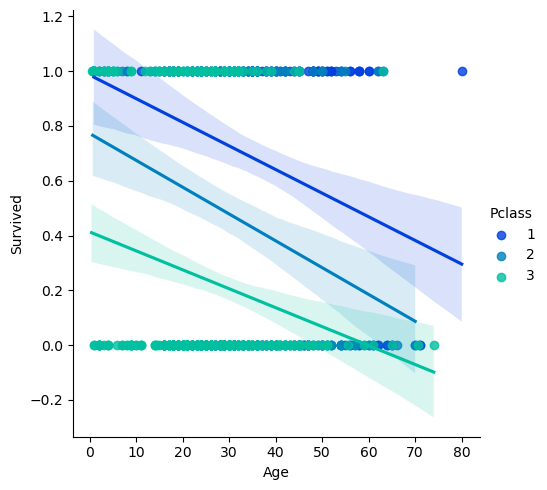

In [45]:
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter')

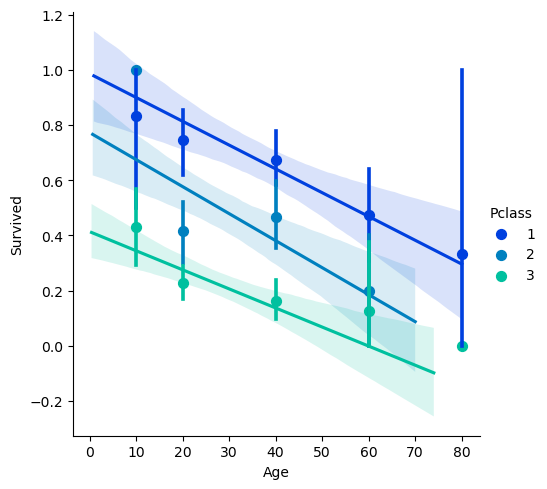

In [46]:
generations = [10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=generations)

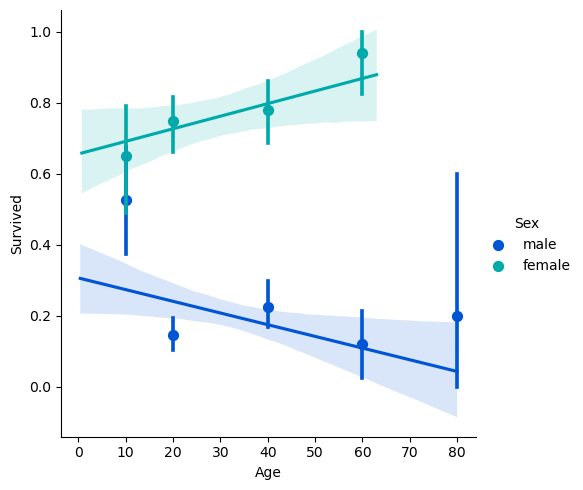

In [47]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex', palette='winter', x_bins=generations)

1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition? Yes
2. Did having a familym member increase the odds of surviving the crash? No

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [59]:
titanic_df_copy1 = DataFrame()
columns_to_copy = ['Person', 'Cabin', 'Survivor', 'Survived', 'Sex', 'Age']

titanic_df_copy1[columns_to_copy] = titanic_df[columns_to_copy]
titanic_df_copy1

,Person,Cabin,Survivor,Survived,Sex,Age
0,male,NaN,no,0,male,22.0
1,female,C85,yes,1,female,38.0
2,female,NaN,yes,1,female,26.0
3,female,C123,yes,1,female,35.0
4,male,NaN,no,0,male,35.0
...,...,...,...,...,...,...
886,male,NaN,no,0,male,27.0
887,female,B42,yes,1,female,19.0
888,female,NaN,no,0,female,NaN
889,male,C148,yes,1,male,26.0


In [60]:
titanic_df_copy1.isnull().sum()

Person        0
Cabin       687
Survivor      0
Survived      0
Sex           0
Age         177
dtype: int64

In [64]:
titanic_df_copy1=titanic_df_copy1.dropna()

In [65]:
titanic_df_copy1.isnull().sum()

Person      0
Cabin       0
Survivor    0
Survived    0
Sex         0
Age         0
dtype: int64

In [66]:
titanic_df_copy1.head()

,Person,Cabin,Survivor,Survived,Sex,Age
1,female,C85,yes,1,female,38.0
3,female,C123,yes,1,female,35.0
6,male,E46,no,0,male,54.0
10,child,G6,yes,1,female,4.0
11,female,C103,yes,1,female,58.0


In [71]:
levels2 = []

for level in titanic_df_copy1['Cabin']:
    levels2.append(level[0])

print(levels2)

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'D', 'B', 'B', 'C', 'F', 'F', 'C', 'E', 'A', 'D', 'D', 'C', 'B', 'E', 'D', 'D', 'C', 'B', 'F', 'C', 'B', 'A', 'C', 'F', 'F', 'B', 'B', 'G', 'A', 'D', 'D', 'C', 'C', 'C', 'D', 'G', 'C', 'B', 'E', 'B', 'C', 'C', 'C', 'D', 'B', 'D', 'C', 'B', 'C', 'C', 'E', 'C', 'B', 'C', 'E', 'C', 'D', 'B', 'C', 'C', 'C', 'E', 'T', 'F', 'C', 'F', 'E', 'D', 'B', 'E', 'C', 'B', 'D', 'G', 'C', 'E', 'C', 'E', 'B', 'C', 'A', 'C', 'C', 'C', 'E', 'E', 'E', 'D', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'E', 'D', 'F', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'A', 'E', 'C', 'E', 'E', 'C', 'A', 'E', 'B', 'D', 'A', 'C', 'F', 'D', 'D', 'D', 'A', 'B', 'B', 'D', 'A', 'D', 'E', 'B', 'B', 'D', 'B', 'B', 'C', 'F', 'C', 'E', 'E', 'C', 'C', 'F', 'C', 'E', 'E', 'B', 'B', 'C', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'B', 'D', 'B', 'A', 'E', 'B', 'E', 'B', 'E', 'D', 'E', 'D', 'A', 'D', 'B', 'C', 'B', 'C']


In [72]:
Deck = DataFrame(levels2)

In [73]:
Deck.columns = ['Decks']

In [75]:
titanic_df_copy1['deck'] = Deck['Decks']
titanic_df_copy1

C:\Users\nloga\AppData\Local\Temp\ipykernel_21008\2911338612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_copy1['deck'] = Deck['Decks']


,Person,Cabin,Survivor,Survived,Sex,Age,deck
1,female,C85,yes,1,female,38.0,C
3,female,C123,yes,1,female,35.0,G
6,male,E46,no,0,male,54.0,A
10,child,G6,yes,1,female,4.0,B
11,female,C103,yes,1,female,58.0,C
...,...,...,...,...,...,...,...
871,female,D35,yes,1,female,47.0,NaN
872,male,B51 B53 B55,no,0,male,33.0,NaN
879,female,C50,yes,1,female,56.0,NaN
887,female,B42,yes,1,female,19.0,NaN


<Axes: xlabel='deck', ylabel='count'>

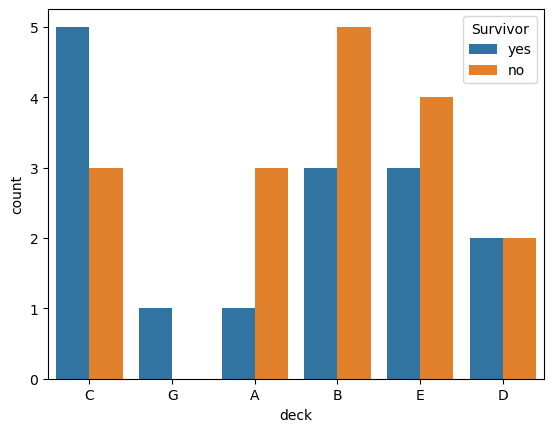

In [76]:
sns.countplot(x='deck', data=titanic_df_copy1, hue='Survivor')